# Data cleaning and preprocessing

In [1]:
import pandas as pd
import numpy as np
import warnings
# suppress the warning caused by setting the first column as index column
warnings.simplefilter(action='ignore', category=FutureWarning) 
data = pd.read_csv('cic2017-ddos-data.csv', index_col=0, header=0)
# dataset contains infinite values in some columns
data = data.replace('inf', np.inf)
print('Label column information:')
print(data.loc[:, 'Label'].describe())
data = data.replace(np.nan, np.inf)
data['Flow Bytes/s'].replace(np.inf, data['Flow Bytes/s'].median(), inplace=True)
data['Flow Packets/s'].replace(np.inf, data['Flow Packets/s'].median(), inplace=True)
# drop two duplicated columns
data = data.drop(['Fwd Header Length - dupl'], axis=1)
print('Dataset after dropping duplicated column: ')
print('Number of instances = {}'.format(data.shape[0]))
print('Number of attributes = {}'.format(data.shape[1]))

Label column information:
count     755663
unique         2
top       BENIGN
freq      627636
Name: Label, dtype: object
Dataset after dropping duplicated column: 
Number of instances = 755663
Number of attributes = 84


# Data visualization

In [2]:
# stratify subsetting the dataset to visualize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

numInstances = data.shape[0]
numComponents = 10
pca = PCA(n_components=numComponents)
pca.fit(data.loc[:, 'Flow Duration':'Idle Min'])

projected = pca.transform(data.loc[:, 'Flow Duration':'Idle Min'])
projected = pd.DataFrame(projected,columns=['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=range(numInstances))
new = pd.concat([data.iloc[:, 0:7], projected, data.iloc[:, 83]], axis=1)

y = new.loc[:, 'Label']
x = new.drop(['Label'], axis=1)

x_taken, x_left, y_taken, y_left = train_test_split(x, y, test_size=0.5, random_state=2, stratify=y)
x_taken = x_taken.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp'], axis=1)
visualizedData = pd.concat([x_taken, y_taken], axis=1)
visualizedData.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Label
45387,-9.586884e+05,2.227568e+06,-1.391430e+06,-8.307002e+06,7.456210e+06,2.102337e+06,4.677273e+06,-354558.006011,2128.925036,8.238052e+06,BENIGN
675305,-2.330648e+07,4.753375e+05,-1.527736e+06,9.361697e+05,-6.244303e+05,6.350010e+05,-3.375668e+05,114818.447284,-36270.473443,-6.220080e+05,DDoS
92638,-1.970141e+07,-8.817201e+05,-1.490109e+06,2.146939e+06,-1.538599e+06,1.932758e+06,7.353248e+05,24690.384675,5155.271522,-1.782142e+05,BENIGN
248279,1.444230e+08,-1.097332e+08,7.922564e+05,-7.133077e+06,1.201362e+07,-1.063179e+07,-2.971634e+06,-489550.358572,-72313.433137,9.596374e+05,BENIGN
248506,-2.403127e+07,5.203969e+05,-1.543236e+06,9.107301e+05,-3.406836e+05,1.744912e+05,-2.999749e+05,-3522.207827,-585.556139,-1.360874e+05,BENIGN


## Andrews curves
<p>Continuous version of parallel coordinates</p>

<AxesSubplot:>

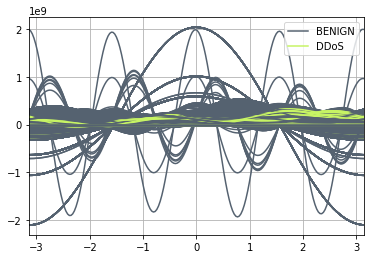

In [3]:
# andrews curves on partial data
pd.plotting.andrews_curves(visualizedData, 'Label', color=('#556270', '#C7F464'))

## UMAP

In [4]:
import matplotlib.pyplot as plot
from sklearn.preprocessing import StandardScaler
import umap

reducer = umap.UMAP()
scaledData = StandardScaler().fit_transform(x_taken.values)
scaledData = reducer.fit_transform(scaledData)
scaledData.shape

C:\Users\trucb\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: 

In [ ]:
import seaborn as sns

plot.scatter(scaledData[:, 0], scaledData[:, 1], sns.color_palette()[x] for x in x_taken.map({'BENIGN':0, 'DDoS':1})])
plot.title('UMAP projection of the data onto 2D space')
plot.gca().set_aspect('equal', 'datalim')